<a href="https://colab.research.google.com/github/aneesh98/ConvNetsVisualization/blob/master/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install 'keras==2.2.*' --force-reinstall


In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
!mkdir !mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:30<00:00, 27.0MB/s]
100% 2.29G/2.29G [01:30<00:00, 27.1MB/s]


In [0]:
!unzip chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0010-0001.jpeg  
  inflating: chest_x

In [0]:
import matplotlib.pyplot as plt
from keras.preprocessing import image 
import os

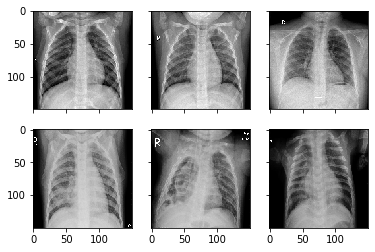

In [17]:
train_path = 'chest_xray/train'
test_path = 'chest_xray/test'
val_path = 'chest_xray/val'
train_normal = [os.path.join(os.path.join(train_path,'NORMAL'), fname) for fname in os.listdir(os.path.join(train_path,'NORMAL'))][:10]
train_p = [os.path.join(os.path.join(train_path,'PNEUMONIA'), fname) for fname in os.listdir(os.path.join(train_path,'PNEUMONIA'))][:10]
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
  for j in range(3):
    if i == 0:
      img = image.load_img(train_normal[j], target_size=(150, 150))
      x = image.img_to_array(img)
      ax[i, j].imshow(img)
    else:
      img = image.load_img(train_p[j], target_size=(150, 150))
      x = image.img_to_array(img)
      ax[i, j].imshow(img)


In [1]:
import tensorflow as tf
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

'1.13.1'

In [0]:
import shutil
p = os.listdir(train_path+'/PNEUMONIA')[:-500]
n = os.listdir(train_path + '/NORMAL')[:-500]
base_path = 'chest_xray/validation'
val_normal = os.path.join(base_path, 'NORMAL')
val_p = os.path.join(base_path, 'PNEUMONIA')
os.mkdir(base_path)
os.mkdir(val_normal)
os.mkdir(val_p)
train_normal_p = os.path.join(train_path,'NORMAL')
train_p_p = os.path.join(train_path,'PNEUMONIA')
for fname in n:
  shutil.move(os.path.join(train_normal_p, fname), os.path.join(val_normal, fname))
for fname in p:
  shutil.move(os.path.join(train_p_p, fname), os.path.join(val_p, fname))

NameError: ignored

In [0]:
import os
TPU_ADDRESS = 'grpc://' + os.environ['COLAB_TPU_ADDR']


In [18]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications import VGG16
import tensorflow as tf
from tensorflow.python.keras import models
from tensorflow.python.keras.models import Model 
from tensorflow.python.keras import layers
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)
validation_generator = test_datagen.flow_from_directory(
    val_path,
    batch_size = 32,
    target_size = (150, 150),
    class_mode = 'categorical'
)
conv_base = VGG16(weights = 'imagenet', include_top = False,
                  input_shape = (150, 150, 3))
model = conv_base.output
model = layers.GlobalAveragePooling2D()(model)
model = layers.Dense(512, activation = 'relu')(model)
predictions = layers.Dense(2, activation = 'softmax')(model)
conv_base.trainable = False
model = Model(inputs=conv_base.input, outputs=predictions)
model.compile(loss = 'categorical_crossentropy', optimizer = tf.train.AdamOptimizer(), 
              metrics = ['acc'])

Found 1000 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [48]:
%pip install tensorflow==1.13.1

     |████████████████████████████████| 92.5MB 24kB/s 
     |████████████████████████████████| 368kB 53.3MB/s 
     |████████████████████████████████| 3.2MB 38.8MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [17]:
# import os
# import tensorflow as tf
# # This address identifies the TPU we'll use when configuring TensorFlow.
# TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
# tf.logging.set_verbosity(tf.logging.INFO)

# tpu_model = tf.contrib.tpu.keras_to_tpu_model(
#     model,
#     strategy=tf.contrib.tpu.TPUDistributionStrategy(tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

INFO:tensorflow:Querying Tensorflow master (grpc://10.15.173.210:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 10203353252380532540)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 286018704526678178)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 7642868720402445790)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 7229229745130684645)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 17868629263733658873)
INFO:tensorflow:*** Available Device: _DeviceAttributes(

In [19]:
history = model.fit_generator(
                  train_generator,
                  steps_per_epoch=60,
                  epochs=30,
                  validation_data=validation_generator,
                  validation_steps=40)

Epoch 1/30
60/60 [==============================] - 50s 836ms/step - loss: 0.4420 - acc: 0.8040 - val_loss: 0.2566 - val_acc: 0.8750
Epoch 2/30
60/60 [==============================] - 49s 812ms/step - loss: 0.2984 - acc: 0.8766 - val_loss: 0.2456 - val_acc: 0.8750
Epoch 3/30
60/60 [==============================] - 48s 799ms/step - loss: 0.2729 - acc: 0.8932 - val_loss: 0.4662 - val_acc: 0.8125
Epoch 4/30
60/60 [==============================] - 45s 748ms/step - loss: 0.2481 - acc: 0.8961 - val_loss: 0.3516 - val_acc: 0.8125
Epoch 5/30
60/60 [==============================] - 45s 757ms/step - loss: 0.2368 - acc: 0.9019 - val_loss: 0.2656 - val_acc: 0.8750
Epoch 6/30
60/60 [==============================] - 44s 740ms/step - loss: 0.2495 - acc: 0.9028 - val_loss: 0.3776 - val_acc: 0.8125
Epoch 7/30
60/60 [==============================] - 45s 754ms/step - loss: 0.2527 - acc: 0.9028 - val_loss: 0.3395 - val_acc: 0.8125
Epoch 8/30
60/60 [==============================] - 44s 736ms/step - 

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(150, 150),
        batch_size=624,
        class_mode=None,  # only data, no labels
        shuffle=False
        )  # keep data in same order as labels

probabilities = model.predict_generator(generator, 1)

In [0]:
from sklearn.metrics import confusion_matrix

n_l = len(os.listdir('chest_xray/test/NORMAL'))
p_l = len(os.listdir('chest_xray/test/PNEUMONIA'))
y_true = np.array([0]*n_l+[1]*p_l)
y_preds = []
for k in probabilities:
  if k[0]>0.5:
    y_preds.append(0)
  else:
    y_preds.append(1)
len(y_true), len(probabilities)
confusion_matrix(y_true, y_preds)

array([[211,  23],
       [ 37, 353]])

In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 2.7MB/s 


In [44]:
!wget https://img.medscapestatic.com/pi/meds/ckb/54/16954tn.jpg

--2019-11-10 14:40:35--  https://img.medscapestatic.com/pi/meds/ckb/54/16954tn.jpg
Resolving img.medscapestatic.com (img.medscapestatic.com)... 104.16.170.79, 104.16.169.79
Connecting to img.medscapestatic.com (img.medscapestatic.com)|104.16.170.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8462 (8.3K) [image/jpeg]
Saving to: ‘16954tn.jpg’

16954tn.jpg         100%[===================>]   8.26K  --.-KB/s    in 0s      

2019-11-10 14:40:36 (101 MB/s) - ‘16954tn.jpg’ saved [8462/8462]



In [50]:
import tensorflow.python.keras
print(keras.__version__)
from keras.models import load_model
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import tensorflow.python.keras.backend as K
import eli5

img_path = '/content/16954tn.jpg'
l=['NORMAL', "PNEUMONIA"]
# `img` is a PIL image of size 224x224
activs = []
bp1= "chest_xray/test/PNEUMONIA"
for img_path in os.listdir("chest_xray/test/PNEUMONIA/")[:10]:
  img = image.load_img(os.path.join(bp1,img_path), target_size=(150, 150))
  # `x` is a float32 Numpy array of shape (224, 224, 3)
  x = image.img_to_array(img)
  # We add a dimension to transform our array into a "batch"
  # of size (1, 224, 224, 3)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  # print(decode_predictions(preds))
  # eli5.show_prediction(model.get_la, x,layer='block5_conv3')
  print(preds)
  african_elephant_output = model.output[:,0]
  last_conv_layer = model.get_layer('block5_conv3')
  grads = K.gradients(model.output[:,1], last_conv_layer.output)[0]
  print(grads)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])
  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the elephant class
  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  # The channel-wise mean of the resulting feature map
  # is our heatmap of class activation
  heatmap = tf.reduce_mean(conv_layer_output_value, axis=-1)
  with tf.Session() as sess:
    x = sess.run(heatmap)
    activs.append(x)
  

2.2.5
[[5.781405e-14 1.000000e+00]]
Tensor("gradients_357/block5_pool_4/MaxPool_grad/MaxPoolGrad:0", shape=(?, 9, 9, 512), dtype=float32)
[[3.8322415e-20 1.0000000e+00]]
Tensor("gradients_358/block5_pool_4/MaxPool_grad/MaxPoolGrad:0", shape=(?, 9, 9, 512), dtype=float32)
[[0.9983565  0.00164344]]
Tensor("gradients_359/block5_pool_4/MaxPool_grad/MaxPoolGrad:0", shape=(?, 9, 9, 512), dtype=float32)
[[2.688135e-19 1.000000e+00]]
Tensor("gradients_360/block5_pool_4/MaxPool_grad/MaxPoolGrad:0", shape=(?, 9, 9, 512), dtype=float32)
[[4.9163184e-11 1.0000000e+00]]
Tensor("gradients_361/block5_pool_4/MaxPool_grad/MaxPoolGrad:0", shape=(?, 9, 9, 512), dtype=float32)
[[1.0000000e+00 2.4006518e-37]]
Tensor("gradients_362/block5_pool_4/MaxPool_grad/MaxPoolGrad:0", shape=(?, 9, 9, 512), dtype=float32)
[[0. 1.]]
Tensor("gradients_363/block5_pool_4/MaxPool_grad/MaxPoolGrad:0", shape=(?, 9, 9, 512), dtype=float32)
[[2.9290727e-19 1.0000000e+00]]
Tensor("gradients_364/block5_pool_4/MaxPool_grad/MaxPool

In [54]:
print(activs)

[array([[ 4.9179917e-17,  5.3907781e-17,  9.3432499e-18, -4.4635695e-17,
        -8.7349201e-17, -1.3356664e-17, -8.8204254e-18, -1.2341948e-19,
        -3.9492911e-19],
       [ 5.6791812e-17,  6.4383709e-17,  5.0517650e-17, -2.5505856e-17,
        -1.4613335e-16, -3.4704862e-17,  7.7135502e-18,  1.3124861e-17,
         4.3071960e-17],
       [ 4.5640405e-17,  5.1199608e-17,  7.9671800e-17,  3.0830709e-17,
        -3.5154620e-17, -1.3126387e-17,  2.6098773e-17,  2.6716438e-17,
         8.0347381e-17],
       [ 3.9257936e-17,  1.1101680e-17,  2.3646960e-17,  3.0836400e-17,
         2.7278531e-17,  4.2866961e-17,  3.8932503e-17,  5.0310475e-17,
         6.9363290e-17],
       [ 5.9176051e-17,  3.4524246e-17,  2.6580569e-17,  2.6723939e-17,
         3.6911926e-17,  4.9214222e-17,  6.6919520e-17,  6.1272424e-17,
         7.5042553e-17],
       [ 6.1433672e-17,  4.8795530e-17,  2.5482478e-17,  2.1905589e-17,
         4.8610864e-17,  5.2987546e-17,  4.3541768e-17,  3.7698614e-17,
         5

In [52]:
heatmaps = []
for value in activs:
  heatmap = np.maximum(value, 0)
  heatmap /= np.max(heatmap)
  heatmaps.append(heatmap)
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


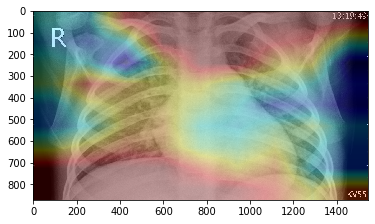

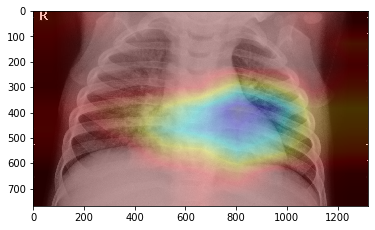

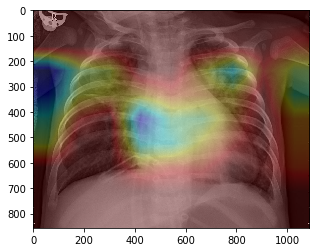

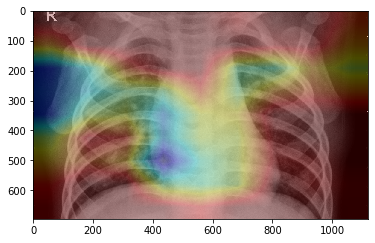

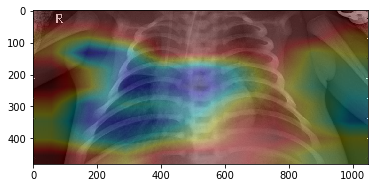

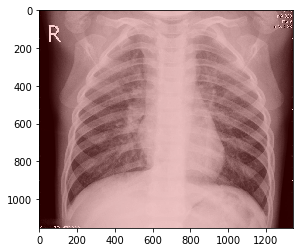

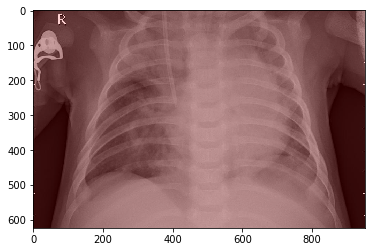

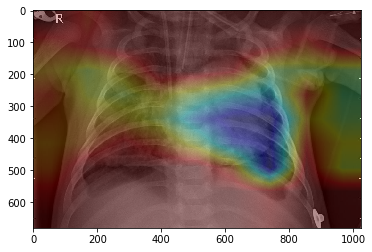

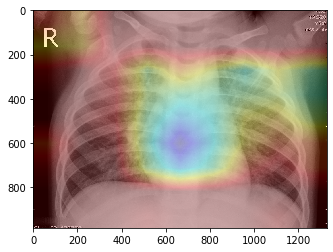

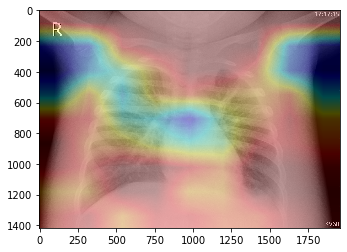

In [57]:
import cv2
%matplotlib inline
x = 0

for img_path in os.listdir("chest_xray/test/PNEUMONIA/")[:10]:
    img = cv2.imread(os.path.join(bp1, img_path))
    heatmap = heatmaps[x]
    # We resize the heatmap to have the same size as the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    # We convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    # We apply the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    # 0.4 here is a heatmap intensity factor
    superimposed_img = heatmap * 0.4 + img
    img = image.array_to_img(superimposed_img)
    # Save the image to disk
    plt.figure(x)
    plt.imshow(img)
    x+=1

In [0]:
import numpy as np
test_image = train_p[5]
print(test_image)


img = image.load_img(test_image, target_size=(150, 150))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis = 0)
x = model.predict(img_arr)
print(x)

In [0]:
model.save('pneumonia_detect1.h5')